In [2]:
# !pip install medpy

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 32.7 MB/s eta 0:00:0000:0100:01
  Created wheel for medpy: filename=MedPy-0.4.0-py3-none-any.whl size=214946 sha256=345fbd5fc6dca0f4b0f164ffbeedcdd5ea8a2c74002bd8fff06f4a16a5f24ba1
  Stored in directory: /home/ec2-user/.cache/pip/wheels/d4/32/c7/6380ab2edb8cca018d39a0f1d43250fd9791922c963117de46
Successfully built medpy


In [1]:
import pandas as pd
import numpy as np
import os
import yaml

from medpy.io import load, save
from joblib import delayed, Parallel


with open('onco-fusion/global_config.yaml', 'r') as f:
    DATA_DIR = yaml.safe_load(f)['data_dir']

In [2]:
LEVEL = 50
WIDTH = 400
LOWER_BOUND = LEVEL - WIDTH//2
UPPER_BOUND = LEVEL + WIDTH//2
INPUT_DATAFRAME_PATH = os.path.join(DATA_DIR, 'data/dataframes/ct_df.csv')

In [3]:
UPPER_BOUND, LOWER_BOUND

(250, -150)

In [4]:
def make_windowed(row):
    """
    Given row of CT data frame, load MHD file, apply window, and save windowed version.
    """
    input_tumor_img_fn = os.path.join(DATA_DIR, row['image_path'])
    output_tumor_img_fn = os.path.join(DATA_DIR, row['windowed_image_path'])
    try:
        tumor_img, header = load(input_tumor_img_fn)
        tumor_img = np.clip(tumor_img, a_min=LOWER_BOUND, a_max=UPPER_BOUND)
        sub_dir = '/'.join(output_tumor_img_fn.split('/')[:-1])
        if not os.path.exists(sub_dir):
            os.mkdir(sub_dir)
        save(tumor_img, output_tumor_img_fn, header)
        print('{} succeeded'.format(input_tumor_img_fn))
    except:
        print('{} failed'.format(input_tumor_img_fn))


In [5]:
df = pd.read_csv(INPUT_DATAFRAME_PATH)

In [6]:
df.head()

,Patient ID,CT Site,CT Vend.,Slice Thickness,kvP,mA,Segmenting Radiologist,R_ovary,L_ovary,Omentum,image_path,segmentation_path,windowed_image_path
0,001,External,GE,5.0,120.0,range,EA,True,True,True,data/ct/mskcc/347437/ctimg.mhd,data/ct/mskcc/347437/segmentation.mha,data/ct/windowed_scans/347437/windowed_ctimg.mhd
1,003,MSKCC,GE,5.0,120.0,range,EA,True,True,True,data/ct/mskcc/347439/ctimg.mhd,data/ct/mskcc/347439/segmentation.mha,data/ct/windowed_scans/347439/windowed_ctimg.mhd
2,004,External,GE,5.0,120.0,range,EA,False,True,True,data/ct/mskcc/347440/ctimg.mhd,data/ct/mskcc/347440/segmentation.mha,data/ct/windowed_scans/347440/windowed_ctimg.mhd
3,005,External,GE,5.0,120.0,range,EA,False,True,True,data/ct/mskcc/347441/ctimg.mhd,data/ct/mskcc/347441/segmentation.mha,data/ct/windowed_scans/347441/windowed_ctimg.mhd
4,006,External,GE,5.0,120.0,250,EA,False,False,True,data/ct/mskcc/347442/ctimg.mhd,data/ct/mskcc/347442/segmentation.mha,data/ct/windowed_scans/347442/windowed_ctimg.mhd


In [7]:
if not os.path.exists(os.path.join(DATA_DIR, 'data/ct/windowed_scans')):
    os.mkdir(os.path.join(DATA_DIR, 'data/ct/windowed_scans'))

In [8]:
# make_windowed(df.iloc[0])

In [9]:
if not os.path.exists(os.path.join(DATA_DIR, 'data/ct/png_scans')):
    os.mkdir(os.path.join(DATA_DIR, 'data/ct/png_scans'))

In [10]:
df['png_path'] = df['windowed_image_path'].apply(lambda x: x.replace('windowed_ctimg.mhd', 'png_scan.png'))
df['png_path'] = df['png_path'].apply(lambda x: x.replace('windowed_scans', 'png_scans'))

In [11]:
df.head()

,Patient ID,CT Site,CT Vend.,Slice Thickness,kvP,mA,Segmenting Radiologist,R_ovary,L_ovary,Omentum,image_path,segmentation_path,windowed_image_path,png_path
0,001,External,GE,5.0,120.0,range,EA,True,True,True,data/ct/mskcc/347437/ctimg.mhd,data/ct/mskcc/347437/segmentation.mha,data/ct/windowed_scans/347437/windowed_ctimg.mhd,data/ct/png_scans/347437/png_scan.png
1,003,MSKCC,GE,5.0,120.0,range,EA,True,True,True,data/ct/mskcc/347439/ctimg.mhd,data/ct/mskcc/347439/segmentation.mha,data/ct/windowed_scans/347439/windowed_ctimg.mhd,data/ct/png_scans/347439/png_scan.png
2,004,External,GE,5.0,120.0,range,EA,False,True,True,data/ct/mskcc/347440/ctimg.mhd,data/ct/mskcc/347440/segmentation.mha,data/ct/windowed_scans/347440/windowed_ctimg.mhd,data/ct/png_scans/347440/png_scan.png
3,005,External,GE,5.0,120.0,range,EA,False,True,True,data/ct/mskcc/347441/ctimg.mhd,data/ct/mskcc/347441/segmentation.mha,data/ct/windowed_scans/347441/windowed_ctimg.mhd,data/ct/png_scans/347441/png_scan.png
4,006,External,GE,5.0,120.0,250,EA,False,False,True,data/ct/mskcc/347442/ctimg.mhd,data/ct/mskcc/347442/segmentation.mha,data/ct/windowed_scans/347442/windowed_ctimg.mhd,data/ct/png_scans/347442/png_scan.png


In [12]:
tumor_img, header = load(os.path.join(DATA_DIR, 'data/ct/mskcc/347437/ctimg.mhd'))

In [14]:
tumor_img.shape

(512, 512, 91)

In [22]:
# !pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [23]:
import os
import numpy
import SimpleITK
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['save', 'load', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [24]:
def sitk_show(img, title=None, margin=0.05, dpi=40 ):
    nda = SimpleITK.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()

In [25]:
# Paths to the .mhd files
filenameT1 = os.path.join(DATA_DIR, 'data/ct/mskcc/347437/ctimg.mhd')
filenameT2 = os.path.join(DATA_DIR, 'data/ct/mskcc/347439/ctimg.mhd')

# Slice index to visualize with 'sitk_show'
idxSlice = 26

# int label to assign to the segmented gray matter
labelGrayMatter = 1

In [26]:
imgT1Original = SimpleITK.ReadImage(filenameT1)
imgT2Original = SimpleITK.ReadImage(filenameT2)

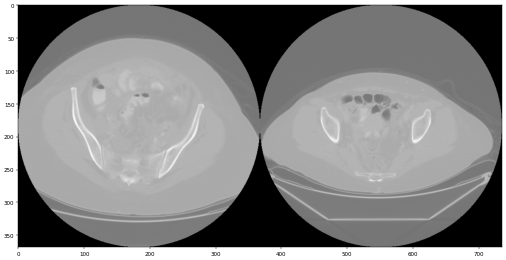

In [27]:
sitk_show(SimpleITK.Tile(imgT1Original[:, :, idxSlice],
                         imgT2Original[:, :, idxSlice],
                         (2, 1, 0)))

In [30]:
imgT1Original.GetSize()

(512, 512, 91)

In [21]:
Parallel(n_jobs=2)(delayed(make_windowed)(row) for idx, row in df.iterrows())

/home/ec2-user/SageMaker/Data/data/ct/mskcc/347439/ctimg.mhd failed/home/ec2-user/SageMaker/Data/data/ct/mskcc/347437/ctimg.mhd failed

/home/ec2-user/SageMaker/Data/data/ct/mskcc/347441/ctimg.mhd failed
/home/ec2-user/SageMaker/Data/data/ct/mskcc/347440/ctimg.mhd failed
/home/ec2-user/SageMaker/Data/data/ct/mskcc/347442/ctimg.mhd failed
/home/ec2-user/SageMaker/Data/data/ct/mskcc/347443/ctimg.mhd failed
/home/ec2-user/SageMaker/Data/data/ct/mskcc/347444/ctimg.mhd failed
/home/ec2-user/SageMaker/Data/data/ct/mskcc/347447/ctimg.mhd failed
/home/ec2-user/SageMaker/Data/data/ct/mskcc/347446/ctimg.mhd failed
/home/ec2-user/SageMaker/Data/data/ct/mskcc/347448/ctimg.mhd failed
/home/ec2-user/SageMaker/Data/data/ct/mskcc/347449/ctimg.mhd failed
/home/ec2-user/SageMaker/Data/data/ct/mskcc/347450/ctimg.mhd failed
/home/ec2-user/SageMaker/Data/data/ct/mskcc/347452/ctimg.mhd failed
/home/ec2-user/SageMaker/Data/data/ct/mskcc/347451/ctimg.mhd failed
/home/ec2-user/SageMaker/Data/data/ct/mskcc/3474

KeyboardInterrupt: 